In [253]:
library(Seurat)#main analyze package
library(ggplot2)
library(dplyr)
library(data.table)
library(patchwork)

In [ ]:
#load 10x
rawdatalf1 <- Read10X(data.dir = "F:/singlecell/lesson8/BP1/")
rawdatalf2 <- Read10X(data.dir = "F:/singlecell/lesson8/BP2/")
# Create Seurat Object from matrix 
lf1 <- CreateSeuratObject(rawdatalf1,
                          min.cells = 1,
                          min.features = 0,
                          project = '10x_lf1')

lf2 <- CreateSeuratObject(rawdatalf2,
                          min.cells = 1,
                          min.features = 0,
                          project = '10x_lf2')

# add metadata original identity
lf1@meta.data$orig.ident <- "lf1"
lf2@meta.data$orig.ident <- "lf2"

#merge Seurat Object in different batch
lf <- merge(lf1,
            y = lf2,
            add.cell.ids = c("lf1.","lf2."),
            project = "10x_lf")
saveRDS(bp,file = "./pipline_reanalyze/raw_bp_rna.rds")

#load 10x
rawdataef1 <- Read10X(data.dir = "F:/singlecell/lesson8/ZQ1/")

rawdataef2 <- Read10X(data.dir = "F:/singlecell/lesson8/ZQ2/")

# Create Seurat Object from matrix 
ef1 <- CreateSeuratObject(rawdataef1,
                          min.cells = 1,
                          min.features = 0,
                          project = '10x_ef1')

ef2 <- CreateSeuratObject(rawdataef2,
                          min.cells = 1,
                          min.features = 0,
                          project = '10x_ef2')

# add metadata original identity
ef1@meta.data$orig.ident <- "ef1"
ef2@meta.data$orig.ident <- "ef2"

#merge Seurat Object in different batch
ef <- merge(ef1,
            y = ef2,
            add.cell.ids = c("ef1.","ef2."),
            project = "10x_ef")
saveRDS(zq,file = "./pipline_reanalyze/raw_zq_rna.rds")

#load 10x
rawdataep1 <- Read10X(data.dir = "F:/singlecell/lesson8/HY1/")

rawdataep2 <- Read10X(data.dir = "F:/singlecell/lesson8/HY2/")

# Create Seurat Object from matrix 
ep1 <- CreateSeuratObject(rawdataep1,
                          min.cells = 1,
                          min.features = 0,
                          project = '10x_ep1')

ep2 <- CreateSeuratObject(rawdataep2,
                          min.cells = 1,
                          min.features = 0,
                          project = '10x_ep2')

# add metadata original identity
ep1@meta.data$orig.ident <- "ep1"
ep2@meta.data$orig.ident <- "ep2"

#merge Seurat Object in different batch
ep <- merge(ep1,
            y = ep2,
            add.cell.ids = c("ep1.","ep2."),
            project = "10x_ep")
saveRDS(hy,file = "./pipline_reanalyze/raw_hy_rna.rds")

#load 10x(bf)
rawdatabf <- Read10X(data.dir = "F:/singlecell/lesson8/new_seahorse/Male_filtered_feature_bc_matrix/")

# Create Seurat Object from matrix 
bf <- CreateSeuratObject(rawdatabf,
                         min.cells = 1,
                         min.features = 0,
                         project = '10x_bf')
# add metadata original identity
bf@meta.data$orig.ident <- "bf"

#load 10x(mf)
rawdatamf <- Read10X(data.dir = "F:/singlecell/lesson8/new_seahorse/3m_filtered_feature_bc_matrix/")

# Create Seurat Object from matrix 
mf <- CreateSeuratObject(rawdatamf,
                         min.cells = 1,
                         min.features = 0,
                         project = '10x_mf')
# add metadata original identity
mf@meta.data$orig.ident <- "mf"

#load 10x(mp)
rawdatamp <- Read10X(data.dir = "F:/singlecell/lesson8/new_seahorse/p2_filtered_feature_bc_matrix/")

# Create Seurat Object from matrix 
mp <- CreateSeuratObject(rawdatamp,
                         min.cells = 1,
                         min.features = 0,
                         project = '10x_mp')
# add metadata original identity
mp@meta.data$orig.ident <- "mp"

#load 10x(lp)
rawdatalp <- Read10X(data.dir = "F:/singlecell/lesson8/new_seahorse/p3_filtered_feature_bc_matrix/")

# Create Seurat Object from matrix 
lp <- CreateSeuratObject(rawdatalp,
                         min.cells = 1,
                         min.features = 0,
                         project = '10x_lp')
# add metadata original identity
lp@meta.data$orig.ident <- "lp"
# add original identity in to metadata
lf1 <- lf[ ,lf@meta.data$orig.ident == 'lf1']
lf2 <- lf[ ,lf@meta.data$orig.ident == 'lf2']

ep1 <- ep[ ,ep@meta.data$orig.ident == 'ep1']
ep2 <- ep[ ,ep@meta.data$orig.ident == 'ep2']

ef1 <- ef[ ,ef@meta.data$orig.ident == 'ef1']
ef2 <- ef[ ,ef@meta.data$orig.ident == 'ef2']

bf <- bf[ ,bf@meta.data$orig.ident == 'bf']
mf <- mf[ ,mf@meta.data$orig.ident == 'mf']
mp <- mp[ ,mp@meta.data$orig.ident == 'mp']
lp <- lp[ ,lp@meta.data$orig.ident == 'lp']

#add group information into metadata
lf1@meta.data$group <- 'lf'
lf2@meta.data$group <- 'lf'
ep1@meta.data$group <- 'ep'
ep2@meta.data$group <- 'ep'
ef1@meta.data$group <- 'ef'
ef2@meta.data$group <- 'ef'

bf@meta.data$group <- 'bf'
mf@meta.data$group <- 'mf'
mp@meta.data$group <- 'mp'
lp@meta.data$group <- 'lp'

# merge Seurat Object
allRNA  <- merge(lf1,
                 y = c(lf2, ep1, ep2, ef1, ef2, bf, mf, mp, lp),
                 #add.cell.ids = c("BP.","HY.",'ZQ.'),
                 project = "10x_RNA")
#add batch information into metadata
allRNA@meta.data$batch = allRNA@meta.data$orig.ident
#show statistics of metadata
table(allRNA$group)
table(allRNA$orig.ident)
table(allRNA$batch)

#save in to rds
allRNA
saveRDS(allRNA, ,file = "./pipline_reanalyze/raw_all_rna_harmony.rds")

# general steps of scRNA-seq analyze in Seurat
allRNA <- NormalizeData(allRNA, verbose = FALSE)

allRNA <- FindVariableFeatures(object = allRNA, mean.cutoff = c(0.125,8), dispersion.cutoff = c(1,Inf))

allRNA <- ScaleData(allRNA, verbose = FALSE)

allRNA <- RunPCA(allRNA, verbose = FALSE, features = VariableFeatures(object = allRNA))

ElbowPlot(allRNA)

allRNA# just show Seurat Object in jupyter notebook(will not work in python script)

# remove batch effect use Harmony
allRNA <- RunHarmony(allRNA,
                     "batch",
                     plot_convergence = TRUE,
                     #assay.use = "SCT", # use it when use SCTranform before
                     assay.use = "RNA"
)

#use harmony in below analyze
allRNA <- RunTSNE(allRNA, reduction = "harmony", verbose = FALSE, dims = 1:20)
allRNA <- RunUMAP(allRNA, reduction = "harmony", verbose = FALSE, dims = 1:20)

allRNA <- FindNeighbors(allRNA, reduction = "harmony", dims = 1:20)
allRNA <- FindClusters(object = allRNA, resolution = 0.125)

allRNA

#draw T-SNE plot
DimPlot(object =allRNA,
        reduction = "tsne",
        label = T,
)
DimPlot(object =allRNA,
        group.by = 'group',
        reduction = "tsne")
DimPlot(object =allRNA,
        group.by = 'batch',
        reduction = "tsne")

#draw UMAP plot
DimPlot(object =allRNA,
        reduction = "umap",
        label = T,
)
DimPlot(object =allRNA,
        group.by = 'group',
        reduction = "umap")
DimPlot(object =allRNA,
        group.by = 'batch',
        reduction = "umap")

saveRDS(allRNA ,file = "./pipline_reanalyze/all_rna_harmony.rds")

#find markers for each cluster
all_markers <- FindAllMarkers(allRNA, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

saveRDS(all_markers ,file = "./pipline_reanalyze/all_rna_markers_harmony.rds") 


FeaturePlot(allRNA, features = 'EVM0012341', 
            reduction = "umap", 
            label=T)
#remove cls0(blood cells)
#remove blood cells
filtered_lf1 <- CreateSeuratObject(allRNA@assays$RNA[  ,allRNA@meta.data$seurat_clusters!=1 & allRNA@meta.data$orig.ident == 'lf1'],
                                   min.cells = 1,
                                   min.features = 0,
                                   project = '10x_filtered_lf1')
filtered_lf2 <- CreateSeuratObject(allRNA@assays$RNA[  ,allRNA@meta.data$seurat_clusters!=1 & allRNA@meta.data$orig.ident == 'lf2'],
                                   min.cells = 1,
                                   min.features = 0,
                                   project = '10x_filtered_lf2')

filtered_ep1 <- CreateSeuratObject(allRNA@assays$RNA[  ,allRNA@meta.data$seurat_clusters!=1 & allRNA@meta.data$orig.ident == 'ep1'],
                                   min.cells = 1,
                                   min.features = 0,
                                   project = '10x_filtered_1')
filtered_ep2 <- CreateSeuratObject(allRNA@assays$RNA[  ,allRNA@meta.data$seurat_clusters!=1 & allRNA@meta.data$orig.ident == 'ep2'],
                                   min.cells = 1,
                                   min.features = 0,
                                   project = '10x_filtered_hy2')

filtered_ef1 <- CreateSeuratObject(allRNA@assays$RNA[  ,allRNA@meta.data$seurat_clusters!=1 & allRNA@meta.data$orig.ident == 'ef1'],
                                   min.cells = 1,
                                   min.features = 0,
                                   project = '10x_filtered_zq1')
filtered_ef2 <- CreateSeuratObject(allRNA@assays$RNA[  ,allRNA@meta.data$seurat_clusters!=1 & allRNA@meta.data$orig.ident == 'ef2'],
                                   min.cells = 1,
                                   min.features = 0,
                                   project = '10x_filtered_zq2')
filtered_bf <- CreateSeuratObject(allRNA@assays$RNA[  ,allRNA@meta.data$seurat_clusters!=1 & allRNA@meta.data$orig.ident == 'bf'],
                                   min.cells = 1,
                                   min.features = 0,
                                   project = '10x_filtered_bf')
filtered_mf <- CreateSeuratObject(allRNA@assays$RNA[  ,allRNA@meta.data$seurat_clusters!=1 & allRNA@meta.data$orig.ident == 'mf'],
                                  min.cells = 1,
                                  min.features = 0,
                                  project = '10x_filtered_mf')
filtered_mp <- CreateSeuratObject(allRNA@assays$RNA[  ,allRNA@meta.data$seurat_clusters!=1 & allRNA@meta.data$orig.ident == 'mp'],
                                  min.cells = 1,
                                  min.features = 0,
                                  project = '10x_filtered_mp')
filtered_lp <- CreateSeuratObject(allRNA@assays$RNA[  ,allRNA@meta.data$seurat_clusters!=1 & allRNA@meta.data$orig.ident == 'lp'],
                                  min.cells = 1,
                                  min.features = 0,
                                  project = '10x_filtered_lp')

filtered_lf1@meta.data$orig.ident <- "lf1"
filtered_lf2@meta.data$orig.ident <- "lf2"
filtered_ep1@meta.data$orig.ident <- "ep1"
filtered_ep2@meta.data$orig.ident <- "ep2"
filtered_ef1@meta.data$orig.ident <- "ef1"
filtered_ef2@meta.data$orig.ident <- "ef2"
filtered_bf@meta.data$orig.ident <- "bf"
filtered_mf@meta.data$orig.ident <- "mf"
filtered_mp@meta.data$orig.ident <- "mp"
filtered_lp@meta.data$orig.ident <- "lp"

filtered_lf1@meta.data$group <- "lf"
filtered_lf2@meta.data$group <- "lf"
filtered_ep1@meta.data$group <- "ep"
filtered_ep2@meta.data$group <- "ep"
filtered_ef1@meta.data$group <- "ef"
filtered_ef2@meta.data$group <- "ef"
filtered_bf@meta.data$group <- "bf"
filtered_mf@meta.data$group <- "mf"
filtered_mp@meta.data$group <- "mp"
filtered_lp@meta.data$group <- "lp"

filtered_lf1@meta.data$batch =
filtered_hy2@meta.data$batch <- "B2"
filtered_bp1@meta.data$batch <- "B1"
filtered_bp2@meta.data$batch <- "B2"
filtered_zq1@meta.data$batch <- "B1"
filtered_zq2@meta.data$batch <- "B2"

filtered <- merge(filtered_lf1,
                  y = c(filtered_lf2,filtered_ep1,filtered_ep2,filtered_ef1,filtered_ef2,filtered_bf, filtered_mf,filtered_mp, filtered_lp),
                  project = "10x_rna_filtered")
filtered@meta.data$batch=filtered@meta.data$orig.ident
table(filtered$group)
table(filtered$orig.ident)
table(filtered$batch)

filtered <- NormalizeData(filtered, verbose = FALSE)

filtered <- FindVariableFeatures(object = filtered, mean.cutoff = c(0.125,8), dispersion.cutoff = c(1,Inf))

filtered <- ScaleData(filtered, verbose = FALSE)

filtered <- RunPCA(filtered, verbose = FALSE, features = VariableFeatures(object = filtered))

ElbowPlot(filtered)
filtered

filtered <- RunHarmony(filtered,
                       "batch",
                       plot_convergence = TRUE,
                       #assay.use = "SCT",
                       assay.use = "RNA"
)

filtered <- RunTSNE(filtered, reduction = "harmony", verbose = FALSE, dims = 1:18)
filtered <- RunUMAP(filtered, reduction = "harmony", verbose = FALSE, dims = 1:18)

filtered <- FindNeighbors(filtered, reduction = "harmony", dims = 1:18)
filtered <- FindClusters(object = filtered, resolution = 0.125)

In [29]:
seahorse <- readRDS('all_rna_filtered_harmony(1).rds')

In [30]:
table(seahorse@meta.data$group)


   bf    ef    ep    lf    lp    mf    mp 
13214  4009  5298  6275  9864  6979 10395 

In [77]:
new_ann  <- read.csv('./annotation new.csv', header =  F)

In [78]:
gene_dict <- data.frame(substring(new_ann$V1, 8, 17), new_ann$V6)
colnames(gene_dict) <- c('gene','genename')
head(gene_dict)

,gene,genename
,<chr>,<chr>
1,EVM0007336,marchf1
2,EVM0012606,march4
3,EVM0012556,march5
4,EVM0016597,march6
5,EVM0014793,march7
6,EVM0018149,march7


In [81]:
# 1. 根据gene_dict将allRNA中的基因进行注释
# -----------------------------------------

# 首先获取allRNA中的基因名列表（即当前的行名）
current_genes <- rownames(allRNA)

# 创建一个映射字典，用于基因ID到基因名的转换，便于快速查找
gene_map <- setNames(gene_dict$genename, gene_dict$gene)

# 找出能够被注释的基因索引（即在gene_dict中存在对应注释的基因）
annotatable_idx <- which(current_genes %in% gene_dict$gene)

# 创建新的基因名向量，初始为原始基因ID
new_gene_names <- current_genes
# 将能注释的基因ID替换为对应的基因名
new_gene_names[annotatable_idx] <- gene_map[current_genes[annotatable_idx]]

# 检查注释后是否有重复的基因名，这可能会导致Seurat对象出错
if(any(duplicated(new_gene_names))) {
  # 对于重复的基因名，添加原始基因ID作为后缀，确保唯一性
  dup_indices <- which(duplicated(new_gene_names) | duplicated(new_gene_names, fromLast = TRUE))
  new_gene_names[dup_indices] <- paste0(new_gene_names[dup_indices], "_", current_genes[dup_indices])
}

# 更新Seurat对象中RNA assay的基因名（原始计数矩阵）
rownames(allRNA@assays$RNA@counts) <- new_gene_names
# 更新Seurat对象中RNA assay的基因名（标准化后的数据矩阵）
rownames(allRNA@assays$RNA@data) <- new_gene_names

# 如果存在meta.features，也更新其行名
if(!is.null(allRNA@assays$RNA@meta.features)) {
  rownames(allRNA@assays$RNA@meta.features) <- new_gene_names
}

In [83]:
allRNA@assays$RNA

Assay data with 19427 features for 78807 cells
First 10 features:
 EVM0015536, mhc1uka_EVM0010492, mettl4_EVM0005304, emilin2b_EVM0006542,
tap2a_EVM0000176, mhc1uka_EVM0017475, synrg_EVM0013420, CU861903.1,
rsl1d1_EVM0016212, GSPT1_EVM0011260 

# find ribo gene

In [234]:
# Find mitochondrial and ribosomal genes using common patterns
#mito_pattern <- "^MT-|^mt-|^Mt-|^MT|^mt[A-Za-z][^_]{3,}$" # Mitochondrial gene pattern
mito_pattern <- "^MT-|^mt-|^Mt-|^(MT|mt)(CH|CL|ERF|FP|SS|ARC|US|ch|cl|erf|fp|ss|arc|us)" # Mitochondrial gene pattern
#mito_pattern <- "^MT-|^mt-|^Mt-|^(MT|mt)(CH|CL|ERF|FP|ARC|ch|cl|erf|fp|arc)" # Mitochondrial gene pattern
ribo_pattern <- "^RP[SL]|^Rp[sl]" # Ribosomal gene pattern

In [235]:
# 2. 计算各个时期细胞的线粒体和核糖体基因相关信息
# ----------------------------------------------

# 找出线粒体基因（通常以MT-开头）
# 在人类和小鼠数据中，线粒体基因通常以MT-或mt-开头
mito_genes <- grep(pattern = mito_pattern, x = new_gene_names, value = TRUE)

# 找出核糖体基因（通常以RPL或RPS开头）
# 核糖体蛋白基因通常以RPL（大亚基）或RPS（小亚基）开头
ribo_genes <- grep(pattern = ribo_pattern, x = new_gene_names, value = TRUE)

In [236]:
mito_genes

[1] "mterf3"           "mtus2a"           "mtss1"            "MTFP1"           
 [5] "MTERF1"           "mtss1lb"          "MTERF4"           "MTCL1"           
 [9] "mtus1b"           "MTSS1_EVM0008289" "mterf2"           "mtss1la"         
[13] "MTARC2"           "MTMR4"            "MTSS1_EVM0007365" "MTUS1"           
[17] "mtch2"            "MTCH1"            "MTUS2"

In [237]:
ribo_genes

[1] "RPL3L"   "RPS11"   "RPS29"   "RPL7A"   "RPS27L"  "RPL5"    "RPS6KB2"
 [8] "RPL9"    "RPL27A"  "RPS20"   "RPL19"   "RPL22"   "RPS3"

In [238]:
# 计算每个细胞中线粒体基因表达的百分比
# 这是一个重要的质控指标，高线粒体比例通常表示细胞质量差或细胞应激
allRNA[["percent.mt"]] <- PercentageFeatureSet(allRNA, features = mito_genes)

# 计算每个细胞中核糖体基因表达的百分比
# 核糖体基因比例也是一个重要质控指标，表示细胞转录活性
allRNA[["percent.rb"]] <- PercentageFeatureSet(allRNA, features = ribo_genes)

# 确保nGenes和nUMIs列存在，如果不存在则从现有数据中获取
# nGenes表示每个细胞检测到的基因数量
# nUMIs表示每个细胞检测到的独特分子标识符总数
allRNA[["nGenes"]] <- allRNA$nFeature_RNA  # 在Seurat v3+中，这个列名是nFeature_RNA
allRNA[["nUMIs"]] <- allRNA$nCount_RNA     # 在Seurat v3+中，这个列名是nCount_RNA

# 3. 汇总各个时期的质控信息
# -----------------------

# 获取所有时期（样本）列表
time_periods <- unique(allRNA$orig.ident)

# 初始化结果数据框，用于存储汇总统计信息
qc_summary <- data.frame()

# 按时期汇总质控信息
for(period in time_periods) {
  # 获取当前时期的细胞子集
  cells_subset <- subset(allRNA, subset = orig.ident == period)
  
  # 计算当前时期的统计信息
  period_stats <- data.frame(
    Period = period,                                # 时期名称
    Cell_Count = ncol(cells_subset),                # 细胞数量
    Mean_nUMIs = mean(cells_subset$nUMIs),          # 平均UMI数
    Median_nUMIs = median(cells_subset$nUMIs),      # UMI数中位数
    SD_nUMIs = sd(cells_subset$nUMIs),              # UMI数标准差
    Mean_nGenes = mean(cells_subset$nGenes),        # 平均基因数
    Median_nGenes = median(cells_subset$nGenes),    # 基因数中位数
    SD_nGenes = sd(cells_subset$nGenes),            # 基因数标准差
    Mean_Percent_MT = mean(cells_subset$percent.mt), # 平均线粒体基因比例
    Median_Percent_MT = median(cells_subset$percent.mt), # 线粒体基因比例中位数
    SD_Percent_MT = sd(cells_subset$percent.mt),     # 线粒体基因比例标准差
    Mean_Percent_RB = mean(cells_subset$percent.rb), # 平均核糖体基因比例
    Median_Percent_RB = median(cells_subset$percent.rb), # 核糖体基因比例中位数
    SD_Percent_RB = sd(cells_subset$percent.rb)      # 核糖体基因比例标准差
  )
  
  # 将当前时期的统计信息添加到结果数据框
  qc_summary <- rbind(qc_summary, period_stats)
}


In [239]:
qc_summary

Period,Cell_Count,Mean_nUMIs,Median_nUMIs,SD_nUMIs,Mean_nGenes,Median_nGenes,SD_nGenes,Mean_Percent_MT,Median_Percent_MT,SD_Percent_MT,Mean_Percent_RB,Median_Percent_RB,SD_Percent_RB
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
lf1,5758,5665.546,2689.0,7707.784,1290.9941,993,904.1998,0.02068110,0,0.03967890,1.262499,1.157340,1.0035160
lf2,2791,2468.463,1398.0,5142.893,780.1777,587,647.0952,0.01871232,0,0.04278031,1.836854,1.619778,1.1588488
ep1,7822,2458.059,1420.5,4274.846,752.0895,576,629.8406,0.01759961,0,0.04204159,1.167285,1.046512,0.7169507
ep2,9377,2223.132,1535.0,3428.099,772.2018,593,616.5739,0.01538071,0,0.03680537,1.271309,1.190476,0.6540458
ef1,2456,2046.223,1267.0,3200.138,795.8384,669,464.4649,0.04020782,0,0.06638277,1.713475,1.540457,0.9617154
ef2,2338,2312.809,1518.5,3038.812,898.0483,701,606.8157,0.04150977,0,0.07031811,1.283267,1.191035,0.7692368
bf,14926,3175.430,1656.0,4913.819,968.3547,762,685.0468,0.02661486,0,0.04688028,1.713453,1.598335,0.8250858
mf,9253,4208.381,1764.0,6002.649,1221.7317,838,999.2784,0.02102062,0,0.03956190,1.545301,1.449976,0.6849123
mp,12330,6318.055,1754.0,9685.705,1249.3030,826,1034.9029,0.01905042,0,0.03956408,1.177872,1.054252,0.5521717


# plot

In [231]:
# 将Seurat对象的元数据转换为数据框，方便使用ggplot2进行绘图
cell_metadata <- allRNA@meta.data
cell_metadata$CellID <- rownames(cell_metadata)  # 添加细胞ID列

# 创建与图中完全相同的标签映射（i, ii-1, ii-2, iii, iv-1, iv-2, v-1, v-2, vi, vii）
# 将原始的时期名称映射到图中显示的标签
label_map <- c(
  "bf" = "i",
  "ef1" = "ii-1", 
  "ef2" = "ii-2", 
  "ep1" = "iii", 
  "ep2" = "iv-1", 
  "lf1" = "iv-2", 
  "lf2" = "v-1", 
  "lp" = "v-2", 
  "mf" = "vi", 
  "mp" = "vii"
)

# 将orig.ident转换为图中使用的标签
cell_metadata$plot_label <- label_map[cell_metadata$orig.ident]

# 创建分组信息，用于添加背景颜色
# 根据图示，前6个时期（i到iv-2）为一组，后4个时期（v-1到vii）为一组
cell_metadata$group <- ifelse(
  cell_metadata$orig.ident %in% c("bf", "ef1", "ef2", "ep1", "ep2", "lf1"),
  "Group1", "Group2"
)

# 创建排序好的标签因子
period_labels <- c("i", "ii-1", "ii-2", "iii", "iv-1", "iv-2", "v-1", "v-2", "vi", "vii")
cell_metadata$plot_label <- factor(cell_metadata$plot_label, levels = period_labels)

# 定义更接近参考图的低饱和度颜色
plot_colors <- c(
  "i" = "#FF9999",       # 淡红色
  "ii-1" = "#FFCC99",    # 淡橙色
  "ii-2" = "#DDFFAA",    # 淡黄绿色
  "iii" = "#E6D0E6",     # 更淡的淡紫色
  "iv-1" = "#99E6E6",    # 淡青色
  "iv-2" = "#BBDDFF",    # 淡蓝色
  "v-1" = "#CCFFCC",     # 淡绿色
  "v-2" = "#B3E6E6",     # 淡青绿色
  "vi" = "#FFCCEB",      # 淡粉色
  "vii" = "#D6E0F0"      # 淡蓝灰色
)

# 定义描边颜色，略深于填充色
stroke_colors <- c(
  "i" = "#CC6666",       # 深红色
  "ii-1" = "#CC9966",    # 深橙色
  "ii-2" = "#AACC77",    # 深黄绿色
  "iii" = "#BBA0BB",     # 深紫色
  "iv-1" = "#66AAAA",    # 深青色
  "iv-2" = "#88AACC",    # 深蓝色
  "v-1" = "#99CC99",     # 深绿色
  "v-2" = "#77AAAA",     # 深青绿色
  "vi" = "#CC99BB",      # 深粉色
  "vii" = "#99AACC"      # 深蓝灰色
)


In [256]:
# 将汇总结果保存为CSV文件，便于后续分析和共享
write.csv(cell_metadata, file = "seahorse_cell_metadata_with_ribo_mito.csv", row.names = FALSE)

In [250]:
nature_theme <- theme_minimal() +
  theme(
    # 轴线设置 - 添加可见坐标轴
    axis.line = element_line(color = "black", size = 0.5),
    axis.ticks.y = element_line(color = "black", size = 0.5),
    axis.ticks.length = unit(2, "mm"),
    
    # 隐藏x轴文字和标签
    axis.text.x = element_text(color = "black", size = 10, face = "bold"),
    axis.title.x = element_blank(),
    
    # 加深y轴文字
    axis.text.y = element_text(color = "black", size = 10, face = "bold"),
    axis.title.y = element_text(color = "black", size = 11, face = "bold"),
    
    # 移除网格线和边框
    panel.grid = element_blank(),
    panel.border = element_blank(),
    
    # 其他设置
    legend.position = "none",
    plot.background = element_rect(fill = "transparent", color = NA),
    panel.background = element_rect(fill = "transparent", color = NA),
    
    # 适当的边距
    plot.margin = unit(c(0.5, 1, 0.5, 1), "cm")
  )

# 创建线粒体基因比例的小提琴图
p1 <- ggplot() +
  # 添加小提琴图，使用深色描边
  geom_violin(data = cell_metadata, 
              aes(x = plot_label, y = percent.mt, fill = plot_label, color = plot_label),
              scale = "width", trim = TRUE, 
              size = 0.7, alpha = 0.7) +  # 设置描边粗细和透明度
  # 使用简洁主题作为基础
  nature_theme +
  # 精细调整主题
  theme(
    axis.title.x = element_blank(),           # 隐藏x轴标题
    axis.text.x = element_text(size = 10),    # x轴文本大小
    axis.title.y = element_text(size = 11),   # y轴标题大小
    panel.grid = element_blank(),             # 删除网格线
    panel.border = element_blank(),           # 删除边框
    legend.position = "none",                 # 隐藏图例
    plot.background = element_rect(fill = "transparent", color = NA), # 透明背景
    panel.background = element_rect(fill = "transparent", color = NA) # 透明面板
  ) +
  # 设置y轴标签
  labs(y = "% MT") +
  # 使用低饱和度颜色填充
  scale_fill_manual(values = plot_colors) +
  # 使用更深的颜色描边
  scale_color_manual(values = stroke_colors)

# 创建核糖体基因比例的小提琴图
p2 <- ggplot() +
  # 添加小提琴图，使用深色描边
  geom_violin(data = cell_metadata, 
              aes(x = plot_label, y = percent.rb, fill = plot_label, color = plot_label),
              scale = "width", trim = TRUE, 
              size = 0.7, alpha = 0.7) +  # 设置描边粗细和透明度
  # 使用简洁主题作为基础
  nature_theme +
  # 精细调整主题
  theme(
    axis.title.x = element_blank(),           # 隐藏x轴标题
    axis.text.x = element_text(size = 10),    # x轴文本大小
    axis.title.y = element_text(size = 11),   # y轴标题大小
    panel.grid = element_blank(),             # 删除网格线
    panel.border = element_blank(),           # 删除边框
    legend.position = "none",                 # 隐藏图例
    plot.background = element_rect(fill = "transparent", color = NA), # 透明背景
    panel.background = element_rect(fill = "transparent", color = NA) # 透明面板
  ) +
  # 设置y轴标签
  labs(y = "% RB") +
  # 使用低饱和度颜色填充
  scale_fill_manual(values = plot_colors) +
  # 使用更深的颜色描边
  scale_color_manual(values = stroke_colors)

# 使用patchwork包垂直组合nUMIs和nGenes图
combined_plot <- p1 / p2 

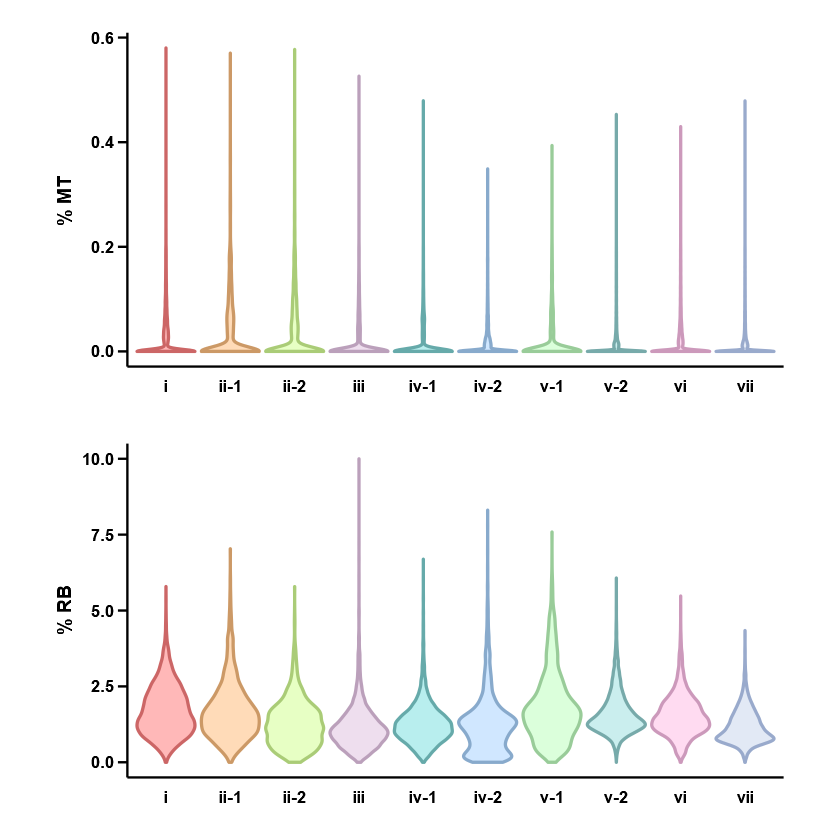

In [251]:
combined_plot

In [257]:
# 保存为高质量图形
ggsave("seahorse_mito_ribo_vioplot.pdf", combined_plot, width = 180, height = 120, units = "mm", dpi = 600, bg = "transparent")